# Iteration 1: Creating decision-tree models

## Load data

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('./data/housing_iteration_0_2_classification.csv')
df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [4]:
y = df.pop('Expensive')

In [5]:
X = df.copy()

## Train-test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Prepare and clean data

Data must be numeric and must not contain NaNs!

In [15]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

In [16]:
y.isna().sum()

0

In [13]:
from sklearn.impute import SimpleImputer

Use imputer to fill nans with means. First fit imputer model using the training data, then transform training and test data with this model.

In [17]:
my_imputer = SimpleImputer().set_output(transform='pandas')
my_imputer.fit(X_train)
X_imp_train = my_imputer.transform(X_train)
X_imp_test = my_imputer.transform(X_test)
#X_imp_test.isna().sum()

## Definition of decision-tree models

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Model 0: with default params

In [20]:
tree0 = DecisionTreeClassifier()
tree0.fit(X = X_imp_train, y = y_train)

y_pred_tree_train = tree0.predict(X_imp_train)

In [23]:
accuracy_score(y_true = y_train, y_pred = y_pred_tree_train)

1.0

Accuracy on the training data is perfect; overfitting? Check on test data!

In [24]:
y_pred_tree_test = tree0.predict(X_imp_test)

In [25]:
accuracy_score(y_true = y_test, y_pred = y_pred_tree_test)

0.910958904109589

Accuracy is good, but variance is quite large, so some overfitting is involved. Visualize tree!

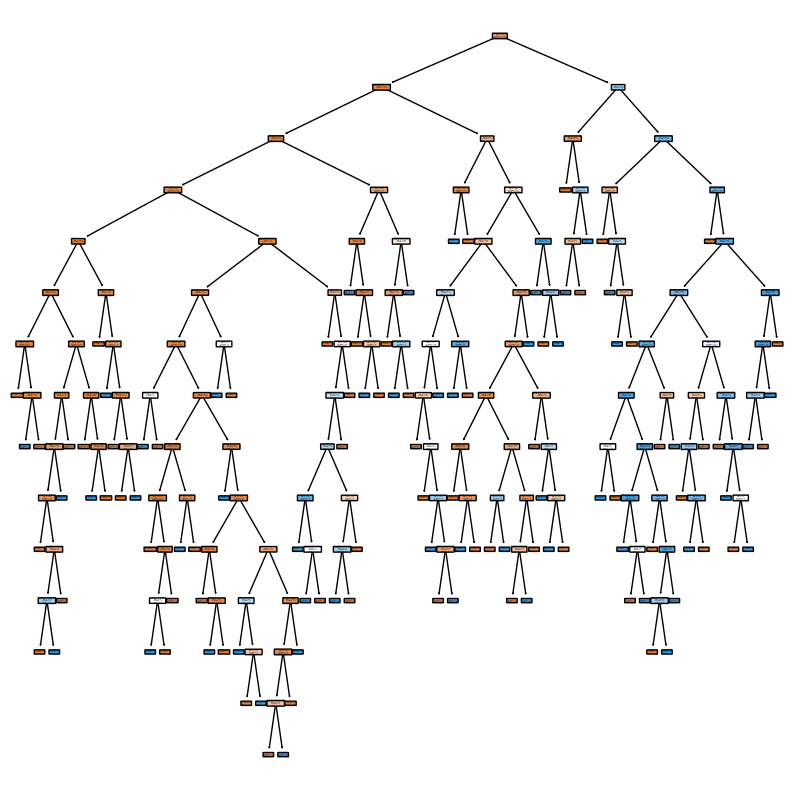

In [27]:
plt.figure(figsize=(10, 10))

plot_tree(
     tree0,
     filled=True,
     rounded=True,
     #class_names=['Not Survived','Survived'],
     feature_names=X.columns
     );

This tree is large, let's prune it!

### Model 1: manually-pruned tree

In [28]:
tree1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)
tree1.fit(X = X_imp_train, y = y_train)

y_pred_tree_train = tree1.predict(X_imp_train)

In [29]:
accuracy_score(y_true = y_train, y_pred = y_pred_tree_train)

0.9126712328767124

In [30]:
y_pred_tree_test = tree1.predict(X_imp_test)

In [31]:
accuracy_score(y_true = y_test, y_pred = y_pred_tree_test)

0.9246575342465754

Accuracy is good and variance is low, seems promising. Visualize tree!

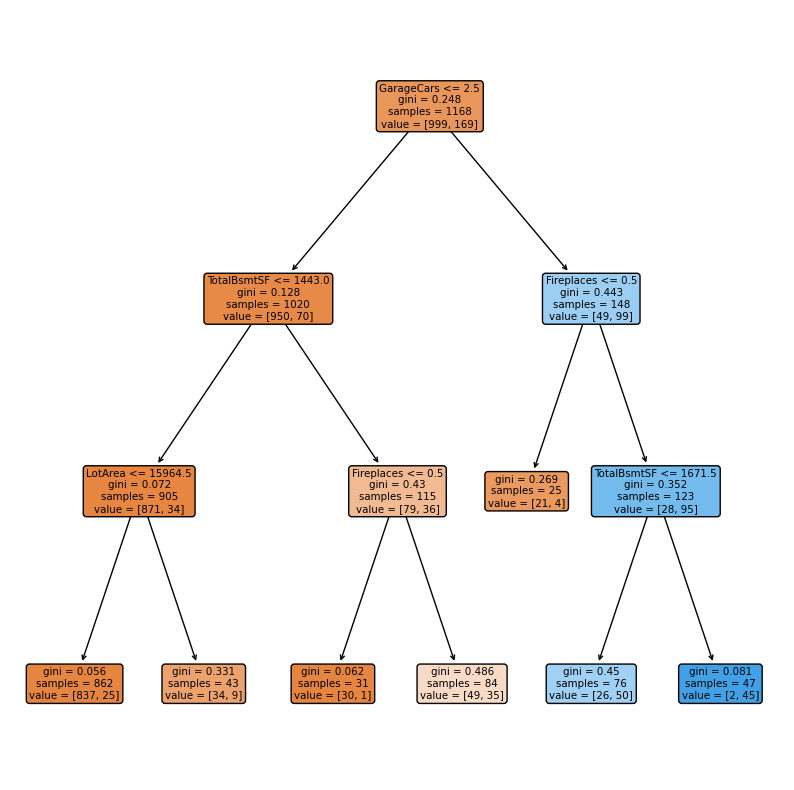

In [32]:
plt.figure(figsize=(10, 10))

plot_tree(
     tree1,
     filled=True,
     rounded=True,
     #class_names=['Not Survived','Survived'],
     feature_names=X.columns
     );